In [1]:
import numpy
from matplotlib import pyplot
import sympy
%matplotlib inline

In [2]:
sympy.init_printing()

In [3]:
x = sympy.symbols('x') #Sets x as a symbolic variable

In [8]:
x, nu, t = sympy.symbols('x nu t')

In [15]:
phi = (sympy.exp(-(x - 4*t)**2 / (4*nu*(t + 1))) + 
       sympy.exp(-(x - 4*t - 2*numpy.pi)**2 / (4*nu*(t + 1))))
phi

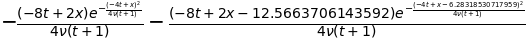

In [20]:
phiprime = phi.diff(x)
phiprime

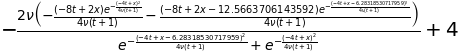

In [21]:
u = -2*nu*(phiprime/phi) + 4
u

In [22]:
from sympy.utilities.lambdify import lambdify

In [23]:
# Lambdify sets u_lamb as a python function that can be called.  
# first parameters in lambdify are variables of your function
# Second parameter is the function itself

u_lamb = lambdify((t, x, nu), u)

print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1, 4, 3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494


In [24]:
# Set Parameters
nx = 101
L = 2*numpy.pi
dx = L/(nx-1)
nu = 0.07
sigma = 0.1
dt = sigma * dx **2 / nu
nt = 100 # time steps

In [28]:
x = numpy.linspace(0.0, L, num=nx)

In [31]:
u0 = numpy.empty(nx)
for i in range(nx):
    u0[i] = u_lamb(0.0, x[i], nu)

In [32]:
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

In [ ]:
u_hist = [u0.copy()]
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interiors
    u[1:-1] = (un[1:-1] - un[1:-1] * (dt/dx) * (un[1:-1] - un[:-2]) +
               nu*(dt/dx**2)*(un[:-1]-2*un[1:-1]+un[2:]))
    # Update the boundary values
    u[0] = (un[0] - un[0] * (dt/dx) * (un[0] - un[-2]) +
           nu * (dt/dx**2) * (un[-2]-2*un[0] + un[1])) 
    u[-1] = u[0]
    # Record
    u_hist.append(u.copy())
    